In [106]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
# Load Gene INFO
HGNC = pd.read_csv("/Users/jiayao/Work/Resources/protein-coding_gene.txt", delimiter="\t")
ENSID2Entrez = dict(zip(HGNC["ensembl_gene_id"].values, HGNC["entrez_id"].values))
GeneSymbol2Entrez = dict(zip(HGNC["symbol"].values, HGNC["entrez_id"].values))
Entrez2Symbol = dict(zip(HGNC["entrez_id"].values, HGNC["symbol"].values))
allen_mouse_genes = loadgenelist("../dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

# Load Exp Zscore Matrix
ExpMat = "../dat/allen-mouse-exp/energy-conn-model.csv"
ExpMat = pd.read_csv(ExpMat, index_col="ROW")

ExpZscoreMat = "../dat/allen-mouse-exp/energy-zscore-conn-model.csv"
ExpZscoreMat = pd.read_csv(ExpZscoreMat, index_col="ROW")

ExpMatNorm = "../dat/allen-mouse-exp/energy-neuronorm.csv"
ExpMatNorm = pd.read_csv(ExpMatNorm, index_col="ROW")

allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Load Brainspan expressions
match_feature = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/match-features.csv", index_col="GENE")
match_feature = match_feature.sort_values("EXP")
match_feature["Rank"] = [1+x for x in range(match_feature.shape[0])]

## 1. Expression Matching

In [ ]:
## Match gene set with exp-match genes
asd_ssc = loadgenelist("../dat/genes/Jon.ssc.txt")
df = ExpressionMatchGeneSet(asd_ssc, match_feature)
df.to_csv("dat/matching/asd_ssc_exp_matches_1000.csv")

In [ ]:
asd_spark = loadgenelist("../dat/genes/Jon.spark.txt")
df = ExpressionMatchGeneSet(asd_spark, match_feature, savefil="dat/matching/asd_spark_exp_matches_1000.csv")

In [ ]:
asd_tada = loadgenelist("../dat/genes/Jon.tada.txt")
df = ExpressionMatchGeneSet(asd_tada, match_feature, savefil="dat/matching/asd_tada_exp_matches_1000.csv")

In [ ]:
asd_sib = loadgenelist("../dat/genes/asd.sib.entrez.list")
df = ExpressionMatchGeneSet(asd_sib, match_feature, savefil="dat/matching/asd_sib_exp_matches_1000.csv")

In [ ]:
asd_asc = loadgenelist("../dat/genes/asd.asc.entrez.list")
df = ExpressionMatchGeneSet(asd_asc, match_feature, savefil="dat/matching/asd_asc_exp_matches_1000.csv")

In [ ]:
asd_spark_tada = loadgenelist("../dat/genes/asd.spark.tada.txt")
df = ExpressionMatchGeneSet(asd_spark_tada, match_feature, savefil="dat/matching/asd_sparktada_exp_matches_1000.csv")

In [62]:
asd_spark_tada = loadgenelist("../dat/genes/asd.spark.tada.300.txt")
df = ExpressionMatchGeneSet(asd_spark_tada, match_feature, savefil="dat/matching/asd_sparktada300_exp_matches_1000.csv")

In [20]:
asc_sub_ssc = loadgenelist("../dat/genes/asc_sub_ssc.txt")
df = ExpressionMatchGeneSet(asc_sub_ssc, match_feature, savefil="dat/matching/asc_sub_ssc_exp_matches_1000.csv")

In [21]:
ssc_sub_asc = loadgenelist("../dat/genes/ssc_sub_asc.txt")
df = ExpressionMatchGeneSet(ssc_sub_asc, match_feature, savefil="dat/matching/ssc_sub_asc_exp_matches_1000.csv")

In [91]:
toppLI = loadgenelist("../dat/genes/top_pLI.100.txt")
df = ExpressionMatchGeneSet(toppLI, match_feature, savefil="dat/matching/top_pLI_exp_matches_1000.csv")

## 2. Exp Level Bias Calculation

In [ ]:
asd_ssc_match_df = pd.read_csv("dat/asd_ssc_exp_matches_1000.csv", index_col="GENE")
ssc_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_ssc_match_df.index.values, 
                                      asd_ssc_match_df, csv_fil="dat/bias/ssc.explevel.rank.tsv")

In [ ]:
asd_spark_match_df = pd.read_csv("dat/asd_spark_exp_matches_1000.csv", index_col="GENE")
spark_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_spark_match_df.index.values
                                        , asd_spark_match_df, csv_fil="dat/bias/spark.explevel.rank.tsv")

In [ ]:
asd_tada_match_df = pd.read_csv("dat/asd_tada_exp_matches_1000.csv", index_col="GENE")
tada_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_tada_match_df.index.values
                                       , asd_tada_match_df, csv_fil="dat/bias/tada.explevel.rank.tsv")

In [ ]:
asd_sib_match_df = pd.read_csv("dat/asd_sib_exp_matches_1000.csv", index_col="GENE")
tada_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_sib_match_df.index.values
                                       , asd_sib_match_df, csv_fil="dat/bias/sib.explevel.rank.tsv")

In [ ]:
asd_asc_match_df = pd.read_csv("dat/asd_asc_exp_matches_1000.csv", index_col="GENE")
asc_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_asc_match_df.index.values, 
                                      asd_asc_match_df, csv_fil="dat/bias/asc.explevel.rank.tsv")

In [10]:
asd_sparktada_match_df = pd.read_csv("dat/matching/asd_sparktada_exp_matches_1000.csv", index_col="GENE")
asd_sparktada_elevel_match = ExpAVGWithExpMatch(ExpMat, asd_sparktada_match_df.index.values, 
                                      asd_sparktada_match_df, csv_fil="dat/bias/sparktada.explevel.rank.tsv")

#### 2.2 expression level with normed 

In [18]:
asd_asc_match_df = pd.read_csv("dat/matching/asd_asc_exp_matches_1000.csv", index_col="GENE")
asc_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asd_asc_match_df.index.values, 
                                      asd_asc_match_df, csv_fil="dat/bias/asc.norm.explevel.rank.tsv")

In [19]:
asd_sparktada_match_df = pd.read_csv("dat/matching/asd_sparktada_exp_matches_1000.csv", index_col="GENE")
asd_sparktada_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asd_sparktada_match_df.index.values, 
                                      asd_sparktada_match_df, csv_fil="dat/bias/sparktada.norm.explevel.rank.tsv")

In [65]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/sparktada.norm.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 3 	 Claustrum; Basomedial_amygdalar_nucleus; Endopiriform_nucleus_dorsal_part
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 31 	 Orbital_area_ventrolateral_part; Infralimbic_area; Primary_visual_area; Prelimbic_area; Anterior_cingulate_area_dorsal_part; Orbital_area_medial_part; Orbital_area_lateral_part; Posterolateral_visual_area; posteromedial_visual_area; Anterior_cingulate_area_ventral_part; Secondary_motor_area; Retrosplenial_area_lateral_agranular_part; Primary_somatosensory_area_trunk; Retrosplenial_area_dorsal_part; Primary_somatosensory_area_upper_limb; Posterior_parietal_association_areas; Agranular_insular_area_dorsal_part; Anteromedial_visual_area; Frontal_pole_cerebral_cortex; Primary_motor_area; Primary_somatosensory_area_lower_limb; Agranular_insular_area_ventral_part; Primary_somatosensory_area_barrel_field; Lateral_visual_area; Gustatory_areas; Temporal_association_areas; Anterolateral_visual_area; Supplemental

In [63]:
asd_sparktada_match_df = pd.read_csv("dat/matching/asd_sparktada300_exp_matches_1000.csv", index_col="GENE")
asd_sparktada_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asd_sparktada_match_df.index.values, 
                                      asd_sparktada_match_df, csv_fil="dat/bias/sparktada300.norm.explevel.rank.tsv")

In [64]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/sparktada300.norm.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 3 	 Endopiriform_nucleus_dorsal_part; Claustrum; Basolateral_amygdalar_nucleus
Hippocampal_region 	 3 	 Field_CA1; Dentate_gyrus; Field_CA2
Isocortex 	 32 	 Anterior_cingulate_area_dorsal_part; Infralimbic_area; Prelimbic_area; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Posterolateral_visual_area; Orbital_area_medial_part; Retrosplenial_area_lateral_agranular_part; posteromedial_visual_area; Anterior_cingulate_area_ventral_part; Primary_somatosensory_area_lower_limb; Secondary_motor_area; Temporal_association_areas; Anteromedial_visual_area; Primary_visual_area; Primary_motor_area; Lateral_visual_area; Posterior_parietal_association_areas; Agranular_insular_area_ventral_part; Ectorhinal_area; Primary_somatosensory_area_trunk; Gustatory_areas; Primary_somatosensory_area_upper_limb; Supplemental_somatosensory_area; Retrosplenial_area_dorsal_part; Agranular_insular_area_dorsal_part; Anterolateral_visual_area; Primary_somatosensory_area_nose; Visceral_a

In [ ]:
asd_sparktada_match_df = pd.read_csv("dat/matching/asd_sparktada300_exp_matches_1000.csv", index_col="GENE")
asd_sparktada_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asd_sparktada_match_df.index.values, 
                                      asd_sparktada_match_df, csv_fil="dat/bias/sparktada300.norm.explevel.rank.tsv")

In [33]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/asc.norm.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 2 	 Claustrum; Endopiriform_nucleus_dorsal_part
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA2; Field_CA1; Field_CA3
Isocortex 	 25 	 Retrosplenial_area_lateral_agranular_part; Anteromedial_visual_area; Infralimbic_area; Prelimbic_area; Anterior_cingulate_area_ventral_part; posteromedial_visual_area; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Primary_visual_area; Posterior_parietal_association_areas; Primary_somatosensory_area_lower_limb; Anterior_cingulate_area_dorsal_part; Retrosplenial_area_dorsal_part; Posterolateral_visual_area; Primary_somatosensory_area_trunk; Orbital_area_medial_part; Anterolateral_visual_area; Lateral_visual_area; Retrosplenial_area_ventral_part; Secondary_motor_area; Primary_motor_area; Primary_somatosensory_area_upper_limb; Visceral_area; Primary_somatosensory_area_barrel_field; Temporal_association_areas
Midbrain 	 1 	 Nucleus_of_the_optic_tract
Olfactory_areas 	 5 	 Anterior_olfactory_nucleus; Dorsal_peduncular_area;

In [34]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/asc.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 1 	 Claustrum
Hippocampal_region 	 4 	 Field_CA2; Field_CA1; Dentate_gyrus; Field_CA3
Isocortex 	 28 	 Retrosplenial_area_lateral_agranular_part; Prelimbic_area; Retrosplenial_area_dorsal_part; Anteromedial_visual_area; Orbital_area_ventrolateral_part; posteromedial_visual_area; Primary_visual_area; Posterior_parietal_association_areas; Orbital_area_lateral_part; Infralimbic_area; Primary_somatosensory_area_lower_limb; Anterior_cingulate_area_ventral_part; Anterior_cingulate_area_dorsal_part; Primary_somatosensory_area_trunk; Orbital_area_medial_part; Posterolateral_visual_area; Lateral_visual_area; Retrosplenial_area_ventral_part; Anterolateral_visual_area; Secondary_motor_area; Primary_somatosensory_area_upper_limb; Primary_motor_area; Perirhinal_area; Primary_somatosensory_area_barrel_field; Temporal_association_areas; Dorsal_auditory_area; Primary_auditory_area; Visceral_area
Midbrain 	 2 	 Nucleus_of_the_optic_tract; Anterior_pretectal_nucleus
Olfactory_areas 	

In [56]:
asd_sparktol_match_df = pd.read_csv("dat/matching/asd_spark_exp_matches_1000.csv", index_col="GENE")
asd_sparktol_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asd_sparktol_match_df.index.values, 
                                      asd_sparktol_match_df, csv_fil="dat/bias/sparktol.norm.explevel.rank.tsv")

In [57]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/sparktol.norm.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 5 	 Claustrum; Endopiriform_nucleus_dorsal_part; Posterior_amygdalar_nucleus; Basolateral_amygdalar_nucleus; Basomedial_amygdalar_nucleus
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 18 	 Infralimbic_area; Retrosplenial_area_lateral_agranular_part; Frontal_pole_cerebral_cortex; Orbital_area_ventrolateral_part; Prelimbic_area; Orbital_area_lateral_part; Anterior_cingulate_area_dorsal_part; Orbital_area_medial_part; Secondary_motor_area; Anterior_cingulate_area_ventral_part; Posterolateral_visual_area; Visceral_area; Anteromedial_visual_area; posteromedial_visual_area; Agranular_insular_area_ventral_part; Supplemental_somatosensory_area; Agranular_insular_area_dorsal_part; Gustatory_areas
Olfactory_areas 	 5 	 Accessory_olfactory_bulb; Dorsal_peduncular_area; Anterior_olfactory_nucleus; Main_olfactory_bulb; Taenia_tecta
Striatum 	 9 	 Nucleus_accumbens; Caudoputamen; Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_sept

In [58]:
asd_sparktol_match_df = pd.read_csv("dat/matching/asd_spark_exp_matches_1000.csv", index_col="GENE")
genes = set(asd_sparktol_match_df.index.values).difference(set([6934, 23090, 2911]))
asd_sparktol_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, genes, 
                                      asd_sparktol_match_df, csv_fil="dat/bias/sparktol.norm.explevel.test.rank.tsv")

In [59]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/sparktol.norm.explevel.test.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 5 	 Claustrum; Endopiriform_nucleus_dorsal_part; Posterior_amygdalar_nucleus; Basolateral_amygdalar_nucleus; Basomedial_amygdalar_nucleus
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 22 	 Infralimbic_area; Retrosplenial_area_lateral_agranular_part; Frontal_pole_cerebral_cortex; Orbital_area_ventrolateral_part; Orbital_area_lateral_part; Prelimbic_area; Anterior_cingulate_area_dorsal_part; Secondary_motor_area; Orbital_area_medial_part; Anterior_cingulate_area_ventral_part; Posterolateral_visual_area; Anteromedial_visual_area; Visceral_area; Agranular_insular_area_ventral_part; posteromedial_visual_area; Agranular_insular_area_dorsal_part; Supplemental_somatosensory_area; Gustatory_areas; Retrosplenial_area_dorsal_part; Primary_somatosensory_area_lower_limb; Primary_visual_area; Primary_motor_area
Olfactory_areas 	 6 	 Accessory_olfactory_bulb; Dorsal_peduncular_area; Anterior_olfactory_nucleus; Taenia_tecta; Main_olfactory_bulb

In [69]:
2911 in asd_sparktol_match_df.index.values

False

In [72]:
asd_sparktol_match_df2 = pd.read_csv("dat/matching/asd_spark_exp_matches_1000.csv", index_col="GENE")
xx = asd_sparktol_match_df2.loc[[23090, 2911], :]

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
GENE,,,,,,,,,,,,,,,,,,,,,
23090,344805,51237,10786,84875,162417,55159,113130,134285,658,2268,...,223,9622,140458,55553,143872,8992,23554,51442,4314,91057
2911,23193,27067,140809,64409,27124,151126,84649,5358,54554,2934,...,5202,79575,728642,6520,1000,81846,80829,4326,63971,26054


In [74]:
asd_sparktol_match_df = pd.read_csv("dat/matching/asd_sparktada_exp_matches_1000.csv", index_col="GENE")
genes = set(asd_sparktol_match_df.index.values).union(set([6934, 23090, 2911]))
asd_sparktol_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, genes, 
                                      pd.concat([asd_sparktol_match_df, xx]), csv_fil="dat/bias/sparktol.norm.explevel.test.rank.tsv")

In [77]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/sparktol.norm.explevel.test.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 2 	 Basomedial_amygdalar_nucleus; Claustrum
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 30 	 Orbital_area_ventrolateral_part; Infralimbic_area; Primary_visual_area; Prelimbic_area; Orbital_area_medial_part; Posterolateral_visual_area; Anterior_cingulate_area_dorsal_part; Anterior_cingulate_area_ventral_part; posteromedial_visual_area; Orbital_area_lateral_part; Retrosplenial_area_lateral_agranular_part; Secondary_motor_area; Primary_somatosensory_area_trunk; Retrosplenial_area_dorsal_part; Anteromedial_visual_area; Posterior_parietal_association_areas; Agranular_insular_area_dorsal_part; Frontal_pole_cerebral_cortex; Primary_somatosensory_area_upper_limb; Agranular_insular_area_ventral_part; Primary_somatosensory_area_lower_limb; Temporal_association_areas; Primary_motor_area; Gustatory_areas; Lateral_visual_area; Primary_somatosensory_area_barrel_field; Supplemental_somatosensory_area; Anterolateral_visual_area; Ectorhinal_ar

In [88]:
ssc_spark_tal = pd.read_csv("../dat/genes/spark-simplex.csv")
top100_spark_tal = set([int(x) for x in ssc_spark_tal.head(120)["GENE"].values])
print(len(top100_spark_tal))
# 96 genes

105


In [94]:
asd_sparktol_match_df = pd.read_csv("dat/matching/asd_spark_exp_matches_1000.csv", index_col="GENE")
genes = top100_spark_tal
asd_sparktol_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, genes, 
                                      asd_sparktol_match_df, csv_fil="dat/bias/sparktol.norm.explevel.100.rank.tsv")

In [95]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/sparktol.norm.explevel.100.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 4 	 Posterior_amygdalar_nucleus; Basomedial_amygdalar_nucleus; Basolateral_amygdalar_nucleus; Claustrum
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA3; Field_CA2; Field_CA1
Isocortex 	 16 	 posteromedial_visual_area; Posterolateral_visual_area; Orbital_area_ventrolateral_part; Retrosplenial_area_lateral_agranular_part; Infralimbic_area; Frontal_pole_cerebral_cortex; Primary_visual_area; Prelimbic_area; Orbital_area_lateral_part; Secondary_motor_area; Anteromedial_visual_area; Anterior_cingulate_area_dorsal_part; Agranular_insular_area_ventral_part; Gustatory_areas; Orbital_area_medial_part; Agranular_insular_area_dorsal_part
Midbrain 	 2 	 Anterior_pretectal_nucleus; Nucleus_of_the_optic_tract
Olfactory_areas 	 4 	 Accessory_olfactory_bulb; Dorsal_peduncular_area; Anterior_olfactory_nucleus; Main_olfactory_bulb
Striatum 	 5 	 Intercalated_amygdalar_nucleus; Caudoputamen; Nucleus_accumbens; Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_septal_nucleus_

In [92]:
asd_sparktol_match_df = pd.read_csv("dat/matching/top_pLI_exp_matches_1000.csv", index_col="GENE")
asd_sparktol_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asd_sparktol_match_df.index.values, 
                                     asd_sparktol_match_df, csv_fil="dat/bias/top_pLI.norm.explevel.rank.tsv")

In [93]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/top_pLI.norm.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 11 	 Prelimbic_area; Frontal_pole_cerebral_cortex; Infralimbic_area; Anterior_cingulate_area_dorsal_part; Secondary_motor_area; Orbital_area_ventrolateral_part; Anterior_cingulate_area_ventral_part; Orbital_area_lateral_part; Orbital_area_medial_part; Retrosplenial_area_dorsal_part; Retrosplenial_area_lateral_agranular_part
Midbrain 	 6 	 Inferior_colliculus_dorsal_nucleus; Inferior_colliculus_central_nucleus; Superior_colliculus_sensory_related; Nucleus_of_the_optic_tract; Medial_pretectal_area; Anterior_pretectal_nucleus
Olfactory_areas 	 4 	 Accessory_olfactory_bulb; Main_olfactory_bulb; Dorsal_peduncular_area; Anterior_olfactory_nucleus
Striatum 	 3 	 Lateral_septal_nucleus_ventral_part; Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_septal_nucleus_caudal_caudodorsal_part
Thalamus 	 9 	 Lateral_habenula; Lateral_posterior_nucleus_of_the_thalamus; Medial_habenula; Subparafascicular_nucleu

#### 2.3 expression level with normed and matching with pLI

In [47]:
asd_sparktada_match_df = pd.read_csv("dat/matching/asd_sparktada_exp_matches_pLI_1000.csv", index_col="GENE")
asd_sparktada_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asd_sparktada_match_df.index.values, 
                                      asd_sparktada_match_df, csv_fil="dat/bias/sparktada.norm.pLI.explevel.rank.tsv")

In [51]:
asd_sparktada_elevel_match.head(3)

,STR,EFFECT
136,Presubiculum,-0.021888
203,Primary_visual_area,-0.040699
204,Posterolateral_visual_area,-0.044565


In [49]:
asd_asc_match_df = pd.read_csv("dat/matching/asd_asc_exp_matches_pLI_1000.csv", index_col="GENE")
asc_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asd_asc_match_df.index.values, 
                                      asd_asc_match_df, csv_fil="dat/bias/asc.norm.pLI.explevel.rank.tsv")

In [50]:
asc_elevel_match.head(3)

,STR,EFFECT
155,Retrosplenial_area_lateral_agranular_part,0.006062
75,Lateral_posterior_nucleus_of_the_thalamus,-0.031218
205,posteromedial_visual_area,-0.035025


In [54]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/sparktada.norm.pLI.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 1 	 Claustrum
Hippocampal_region 	 3 	 Dentate_gyrus; Field_CA1; Field_CA2
Isocortex 	 35 	 Primary_visual_area; Posterolateral_visual_area; Orbital_area_ventrolateral_part; Orbital_area_lateral_part; posteromedial_visual_area; Orbital_area_medial_part; Prelimbic_area; Frontal_pole_cerebral_cortex; Infralimbic_area; Anterior_cingulate_area_dorsal_part; Retrosplenial_area_dorsal_part; Anterior_cingulate_area_ventral_part; Retrosplenial_area_lateral_agranular_part; Secondary_motor_area; Ventral_auditory_area; Agranular_insular_area_dorsal_part; Primary_somatosensory_area_trunk; Primary_somatosensory_area_upper_limb; Ectorhinal_area; Dorsal_auditory_area; Primary_somatosensory_area_barrel_field; Primary_auditory_area; Supplemental_somatosensory_area; Temporal_association_areas; Posterior_parietal_association_areas; Primary_motor_area; Agranular_insular_area_ventral_part; Anteromedial_visual_area; Gustatory_areas; Lateral_visual_area; Primary_somatosensory_area_mouth; A

In [55]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/asc.norm.pLI.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Hippocampal_region 	 3 	 Dentate_gyrus; Field_CA2; Field_CA1
Isocortex 	 22 	 Retrosplenial_area_lateral_agranular_part; posteromedial_visual_area; Orbital_area_lateral_part; Posterolateral_visual_area; Primary_visual_area; Anteromedial_visual_area; Prelimbic_area; Retrosplenial_area_dorsal_part; Orbital_area_ventrolateral_part; Anterior_cingulate_area_ventral_part; Infralimbic_area; Perirhinal_area; Posterior_parietal_association_areas; Primary_somatosensory_area_lower_limb; Anterior_cingulate_area_dorsal_part; Orbital_area_medial_part; Primary_somatosensory_area_trunk; Retrosplenial_area_ventral_part; Lateral_visual_area; Anterolateral_visual_area; Visceral_area; Temporal_association_areas
Olfactory_areas 	 3 	 Anterior_olfactory_nucleus; Piriform_amygdalar_area; Dorsal_peduncular_area
Striatum 	 2 	 Olfactory_tubercle; Nucleus_accumbens
Thalamus 	 15 	 Lateral_posterior_nucleus_of_the_thalamus; Rhomboid_nucleus; Posterior_complex_of_the_thalamus; Central_medial_nucleus_of_the_thalam

In [60]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/asd.asc.norm.zmatch.rank.csv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 2 	 Claustrum; Endopiriform_nucleus_dorsal_part
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 23 	 Retrosplenial_area_lateral_agranular_part; Infralimbic_area; Prelimbic_area; Anterior_cingulate_area_ventral_part; Anteromedial_visual_area; Posterior_parietal_association_areas; Primary_somatosensory_area_lower_limb; Primary_visual_area; Anterior_cingulate_area_dorsal_part; Retrosplenial_area_dorsal_part; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; posteromedial_visual_area; Primary_somatosensory_area_trunk; Orbital_area_medial_part; Posterolateral_visual_area; Retrosplenial_area_ventral_part; Secondary_motor_area; Primary_motor_area; Primary_somatosensory_area_upper_limb; Anterolateral_visual_area; Lateral_visual_area; Temporal_association_areas
Midbrain 	 2 	 Anterior_pretectal_nucleus; Nucleus_of_the_optic_tract
Olfactory_areas 	 3 	 Anterior_olfactory_nucleus; Dorsal_peduncular_area; Taenia_tecta
Striatum 	 5 	

In [61]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/asd.norm.sparktada.zmatch.rank.csv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 2 	 Basomedial_amygdalar_nucleus; Lateral_amygdalar_nucleus
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 28 	 Infralimbic_area; Orbital_area_ventrolateral_part; Prelimbic_area; Primary_visual_area; Orbital_area_lateral_part; Anterior_cingulate_area_dorsal_part; Anterior_cingulate_area_ventral_part; Orbital_area_medial_part; Posterolateral_visual_area; Secondary_motor_area; Primary_somatosensory_area_trunk; Retrosplenial_area_lateral_agranular_part; posteromedial_visual_area; Primary_somatosensory_area_upper_limb; Posterior_parietal_association_areas; Primary_motor_area; Agranular_insular_area_dorsal_part; Primary_somatosensory_area_lower_limb; Agranular_insular_area_ventral_part; Retrosplenial_area_dorsal_part; Anteromedial_visual_area; Gustatory_areas; Primary_somatosensory_area_barrel_field; Frontal_pole_cerebral_cortex; Anterolateral_visual_area; Lateral_visual_area; Temporal_association_areas; Primary_somatosensory_area_mou

#### 2.3 gene set substraction

In [35]:
asc_sub_ssc_match_df = pd.read_csv("dat/matching/asc_sub_ssc_exp_matches_1000.csv", index_col="GENE")
asc_sub_ssc_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asc_sub_ssc_match_df.index.values, 
                                      asc_sub_ssc_match_df, csv_fil="dat/bias/asc_sub_ssc.norm.explevel.rank.tsv")

In [37]:
ssc_sub_asc_match_df = pd.read_csv("dat/matching/ssc_sub_asc_exp_matches_1000.csv", index_col="GENE")
ssc_sub_asc_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, ssc_sub_asc_match_df.index.values, 
                                      ssc_sub_asc_match_df, csv_fil="dat/bias/ssc_sub_asc.norm.explevel.rank.tsv")

In [38]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/asc_sub_ssc.norm.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)

Cortical_subplate 	 1 	 Lateral_amygdalar_nucleus
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 31 	 Retrosplenial_area_lateral_agranular_part; posteromedial_visual_area; Posterior_parietal_association_areas; Anterior_cingulate_area_ventral_part; Primary_visual_area; Primary_somatosensory_area_lower_limb; Primary_somatosensory_area_trunk; Anteromedial_visual_area; Orbital_area_medial_part; Temporal_association_areas; Retrosplenial_area_dorsal_part; Ectorhinal_area; Anterolateral_visual_area; Lateral_visual_area; Prelimbic_area; Orbital_area_lateral_part; Primary_somatosensory_area_upper_limb; Posterolateral_visual_area; Orbital_area_ventrolateral_part; Anterior_cingulate_area_dorsal_part; Primary_somatosensory_area_barrel_field; Retrosplenial_area_ventral_part; Gustatory_areas; Agranular_insular_area_ventral_part; Infralimbic_area; Primary_auditory_area; Primary_somatosensory_area_nose; Supplemental_somatosensory_area; Visceral_area; Perirhinal_are

In [39]:
ssc_sub_asc_elevel_match = pd.read_csv("dat/bias/ssc_sub_asc.norm.explevel.rank.tsv", index_col="STR")
RegionDistributions(ssc_sub_asc_elevel_match)

Cortical_subplate 	 2 	 Posterior_amygdalar_nucleus; Claustrum
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA3; Field_CA2; Field_CA1
Isocortex 	 8 	 Frontal_pole_cerebral_cortex; Orbital_area_ventrolateral_part; Infralimbic_area; Retrosplenial_area_lateral_agranular_part; Orbital_area_lateral_part; Anterior_cingulate_area_ventral_part; Prelimbic_area; posteromedial_visual_area
Midbrain 	 6 	 Anterior_pretectal_nucleus; Nucleus_of_the_optic_tract; Inferior_colliculus_central_nucleus; Inferior_colliculus_dorsal_nucleus; Superior_colliculus_sensory_related; Inferior_colliculus_external_nucleus
Olfactory_areas 	 5 	 Accessory_olfactory_bulb; Main_olfactory_bulb; Anterior_olfactory_nucleus; Dorsal_peduncular_area; Taenia_tecta
Striatum 	 6 	 Lateral_septal_nucleus_ventral_part; Lateral_septal_nucleus_caudal_caudodorsal_part; Septofimbrial_nucleus; Lateral_septal_nucleus_rostral_rostroventral_part; Caudoputamen; Nucleus_accumbens
Hypothalamus 	 2 	 Dorsal_premammillary_nucleus; Dorsomedial

## 3 Bias considering constraint

In [98]:
gnomad_cons = pd.read_csv("/Users/jiayao/Work/Resources/gnomad.v2.1.1.lof_metrics.by_gene.txt", delimiter="\t")

In [101]:
print(gnomad_cons.columns.values)
gnomad_cons.head(2)

['gene' 'transcript' 'obs_mis' 'exp_mis' 'oe_mis' 'mu_mis' 'possible_mis'
 'obs_mis_pphen' 'exp_mis_pphen' 'oe_mis_pphen' 'possible_mis_pphen'
 'obs_syn' 'exp_syn' 'oe_syn' 'mu_syn' 'possible_syn' 'obs_lof' 'mu_lof'
 'possible_lof' 'exp_lof' 'pLI' 'pNull' 'pRec' 'oe_lof' 'oe_syn_lower'
 'oe_syn_upper' 'oe_mis_lower' 'oe_mis_upper' 'oe_lof_lower'
 'oe_lof_upper' 'constraint_flag' 'syn_z' 'mis_z' 'lof_z'
 'oe_lof_upper_rank' 'oe_lof_upper_bin' 'oe_lof_upper_bin_6' 'n_sites'
 'classic_caf' 'max_af' 'no_lofs' 'obs_het_lof' 'obs_hom_lof' 'defined'
 'p' 'exp_hom_lof' 'classic_caf_afr' 'classic_caf_amr' 'classic_caf_asj'
 'classic_caf_eas' 'classic_caf_fin' 'classic_caf_nfe' 'classic_caf_oth'
 'classic_caf_sas' 'p_afr' 'p_amr' 'p_asj' 'p_eas' 'p_fin' 'p_nfe' 'p_oth'
 'p_sas' 'transcript_type' 'gene_id' 'transcript_level' 'cds_length'
 'num_coding_exons' 'gene_type' 'gene_length' 'exac_pLI' 'exac_obs_lof'
 'exac_exp_lof' 'exac_oe_lof' 'brain_expression' 'chromosome'
 'start_position' 'end_posi

,gene,transcript,obs_mis,exp_mis,oe_mis,mu_mis,possible_mis,obs_mis_pphen,exp_mis_pphen,oe_mis_pphen,...,gene_type,gene_length,exac_pLI,exac_obs_lof,exac_exp_lof,exac_oe_lof,brain_expression,chromosome,start_position,end_position
0,MED13,ENST00000397786,871,1117.8,0.77921,0.000056,14195,314.0,529.75,0.59273,...,protein_coding,122678,1.0,0.0,64.393,0.000000,NaN,17,60019966,60142643
1,NIPBL,ENST00000282516,846,1441.5,0.58688,0.000074,18540,158.0,543.10,0.29092,...,protein_coding,189655,1.0,1.0,110.570,0.009044,NaN,5,36876861,37066515


In [104]:
Gene2LoFZ = {}
for i, row in gnomad_cons.iterrows():
    try:
        Gene2LoFZ[GeneSymbol2Entrez[row["gene"]]] = max(1, row["lof_z"] + 1)
    except:
        continue

(array([1.043e+04, 5.392e+03, 1.816e+03, 3.880e+02, 7.700e+01, 2.400e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.   ,  3.276,  5.552,  7.828, 10.104, 12.38 , 14.656, 16.932,
        19.208, 21.484, 23.76 ]),
 <a list of 10 Patch objects>)

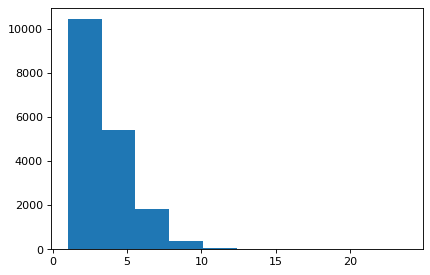

In [105]:
plt.hist(Gene2LoFZ.values())

In [ ]:
asd_asc_match_df = pd.read_csv("dat/matching/asd_asc_exp_matches_pLI_1000.csv", index_col="GENE")
asc_elevel_match = ExpAVGWithExpMatch(ExpMatNorm, asd_asc_match_df.index.values, 
                                      asd_asc_match_df, csv_fil="dat/bias/asc.norm.pLI.explevel.rank.tsv")

In [111]:
asd_sparktada_match_df = pd.read_csv("dat/matching/asd_sparktada_exp_matches_pLI_1000.csv", index_col="GENE")
asd_sparktada_elevel_match = ExpAVGWithExpMatch_Constraint(ExpMatNorm, asd_sparktada_match_df.index.values, 
                        asd_sparktada_match_df, Gene2LoFZ, csv_fil="dat/bias/sparktada.norm.lofz.explevel.rank.tsv")
asd_sparktada_elevel_match = pd.read_csv("dat/bias/sparktada.norm.lofz.explevel.rank.tsv", index_col="STR")
RegionDistributions(asd_sparktada_elevel_match)

Cortical_subplate 	 2 	 Basomedial_amygdalar_nucleus; Endopiriform_nucleus_ventral_part
Hippocampal_region 	 3 	 Field_CA1; Dentate_gyrus; Field_CA2
Isocortex 	 31 	 Primary_visual_area; Orbital_area_ventrolateral_part; Infralimbic_area; Orbital_area_lateral_part; Primary_somatosensory_area_trunk; Posterolateral_visual_area; posteromedial_visual_area; Primary_somatosensory_area_upper_limb; Posterior_parietal_association_areas; Anterior_cingulate_area_dorsal_part; Prelimbic_area; Orbital_area_medial_part; Primary_somatosensory_area_barrel_field; Retrosplenial_area_dorsal_part; Anteromedial_visual_area; Primary_somatosensory_area_lower_limb; Primary_motor_area; Anterior_cingulate_area_ventral_part; Secondary_motor_area; Retrosplenial_area_lateral_agranular_part; Agranular_insular_area_dorsal_part; Primary_somatosensory_area_mouth; Agranular_insular_area_ventral_part; Anterolateral_visual_area; Gustatory_areas; Primary_somatosensory_area_nose; Lateral_visual_area; Supplemental_somatosenso

In [112]:
asd_asc_zmatch_lofz = pd.read_csv("dat/bias/asd.asc.norm.lofz.zmatch.rank.csv", index_col="STR")
RegionDistributions(asd_asc_zmatch_lofz)

Cortical_subplate 	 2 	 Claustrum; Endopiriform_nucleus_dorsal_part
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 23 	 Retrosplenial_area_lateral_agranular_part; Infralimbic_area; Prelimbic_area; Anterior_cingulate_area_ventral_part; Anteromedial_visual_area; Posterior_parietal_association_areas; Primary_somatosensory_area_lower_limb; Primary_visual_area; Retrosplenial_area_dorsal_part; Anterior_cingulate_area_dorsal_part; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; posteromedial_visual_area; Primary_somatosensory_area_trunk; Orbital_area_medial_part; Posterolateral_visual_area; Retrosplenial_area_ventral_part; Secondary_motor_area; Primary_motor_area; Primary_somatosensory_area_upper_limb; Anterolateral_visual_area; Lateral_visual_area; Temporal_association_areas
Midbrain 	 3 	 Nucleus_of_the_optic_tract; Anterior_pretectal_nucleus; Superior_colliculus_sensory_related
Olfactory_areas 	 3 	 Anterior_olfactory_nucleus; Dorsal_peduncu

In [113]:
asd_sparktada_zmatch_lofz = pd.read_csv("dat/bias/asd.norm.lofz.sparktada.zmatch.rank.csv", index_col="STR")
RegionDistributions(asd_sparktada_zmatch_lofz)

Cortical_subplate 	 1 	 Basomedial_amygdalar_nucleus
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Isocortex 	 28 	 Infralimbic_area; Orbital_area_ventrolateral_part; Prelimbic_area; Primary_visual_area; Orbital_area_lateral_part; Anterior_cingulate_area_dorsal_part; Anterior_cingulate_area_ventral_part; Orbital_area_medial_part; Secondary_motor_area; Posterolateral_visual_area; Primary_somatosensory_area_trunk; Retrosplenial_area_lateral_agranular_part; posteromedial_visual_area; Posterior_parietal_association_areas; Primary_somatosensory_area_upper_limb; Primary_motor_area; Primary_somatosensory_area_lower_limb; Retrosplenial_area_dorsal_part; Agranular_insular_area_dorsal_part; Agranular_insular_area_ventral_part; Anteromedial_visual_area; Gustatory_areas; Primary_somatosensory_area_barrel_field; Frontal_pole_cerebral_cortex; Anterolateral_visual_area; Lateral_visual_area; Primary_somatosensory_area_mouth; Temporal_association_areas
Midbrain 	 1 	 Inferior_

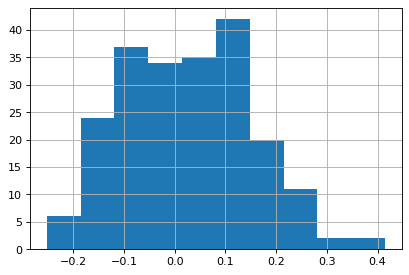

In [119]:
ssc_wigler_neuronorm = pd.read_csv("dat/bias/sscwigler.neuronorm.csv", index_col="STR")
ssc_wigler_neuronorm["EFFECT"].hist()

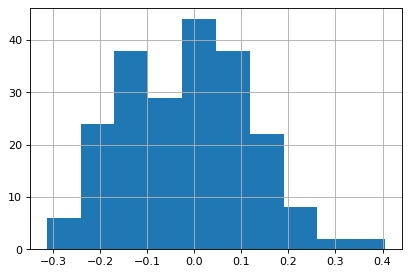

In [120]:
ssc_wigler_expV1 = pd.read_csv("dat/bias/sscwigler.expmatV1.csv", index_col="STR")
ssc_wigler_expV1["EFFECT"].hist()

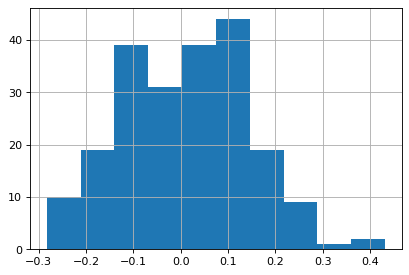

In [121]:
ssc_wigler_expV2 = pd.read_csv("dat/bias/sscwigler.expmatV2.csv", index_col="STR")
ssc_wigler_expV2["EFFECT"].hist()

In [ ]:
asc_sub_ssc_elevel_match = pd.read_csv("dat/bias/sparktada.norm.pLI.explevel.rank.tsv", index_col="STR")
RegionDistributions(asc_sub_ssc_elevel_match)